In [1]:
import numpy as np

from keras.layers import Input, Dropout, Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten

from keras.models import Model

from keras.layers.merge import concatenate
from keras.utils import to_categorical
from keras.utils import plot_model

from keras.datasets import mnist

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Build a CNN Y-net with two independent inputs 
 using Keras functional API

* ## Read & convert the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

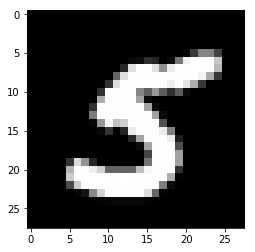

In [4]:
# Show a randomly selected pic from the dataset
plt.imshow(X_train[np.random.randint(60000)], cmap = 'gray')
plt.show()

In [0]:
# No. of labels
n_labels = len(np.unique(y_train))

In [6]:
n_labels

10

In [0]:
# Image size
img_size = X_train.shape[1]

In [0]:
# Convert labels to categoroical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
# Reshape and noemalize input imgs
X_train = X_train.reshape([-1, img_size, img_size, 1])
X_test = X_test.reshape([-1, img_size, img_size, 1])

In [0]:
# Normalize 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

* ## Define net params

In [0]:
input_shape = (img_size, img_size, 1)
batch_size = 32
kernel_size = 3
dropout = .4
n_filters = 32

* ## Build the model

In [12]:
# Left branch
inputs_left = Input(shape = input_shape)
x1 = inputs_left
filters = n_filters

# Build 3 layers of Conv2D-Dropout-Pooling
for i in range(3):
    x1 = Conv2D(filters = filters, 
                kernel_size = kernel_size,
                padding = 'same', 
                activation = 'relu')(x1)
    x1 = Dropout(dropout)(x1)
    x1 = MaxPooling2D()(x1)
    filters *= 2

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Right branch
inputs_right = Input(shape = input_shape)
x2 = inputs_right
filters = n_filters

# Build 3 layers of Conv2D-Dropout-Pooling
for i in range(3):
    x2 = Conv2D(filters = filters, 
                kernel_size = kernel_size,
                padding = 'same', 
                activation = 'relu',
                dilation_rate = 2)(x2)
    x2 = Dropout(dropout)(x2)
    x2 = MaxPooling2D()(x2)
    filters *= 2

In [0]:
# Merge inputs
y = concatenate([x1, x2])

# Flatten & dropout
y = Flatten()(y)
y = Dropout(dropout)(y)

output = Dense(n_labels, activation = 'softmax')(y)

In [0]:
# Build the model
model = Model([inputs_left, inputs_right], output)

In [0]:
plot_model(model, to_file = 'model_01.png')

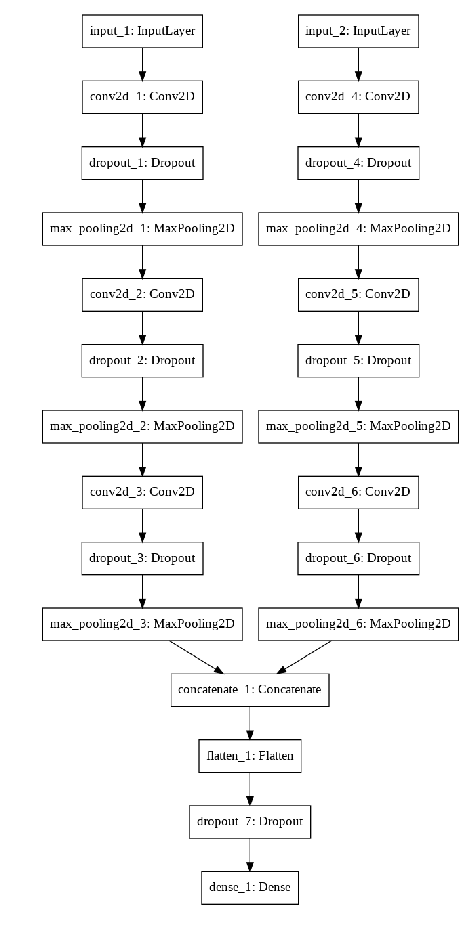

In [17]:
png = plt.imread('model_01.png')
plt.figure(figsize = (33, 16.5))
plt.imshow(png)
plt.axis('off')
plt.show()

* ## Compile the model

In [0]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

* ## Fit the model

In [20]:
model.fit([X_train, X_train], y_train,
          validation_data = ([X_test, X_test], y_test),
          epochs = 20, 
          batch_size = batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.0795 - acc: 0.9756 - val_loss: 0.1287 - val_acc: 0.9889
Epoch 2/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.0559 - acc: 0.9824 - val_loss: 0.0774 - val_acc: 0.9902
Epoch 3/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.0502 - acc: 0.9836 - val_loss: 0.0686 - val_acc: 0.9918
Epoch 4/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.0440 - acc: 0.9860 - val_loss: 0.0746 - val_acc: 0.9919
Epoch 5/20
60000/60000 [==============================] - 16s 260us/step - loss: 0.0417 - acc: 0.9866 - val_loss: 0.0566 - val_acc: 0.9929
Epoch 6/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.0375 - acc: 0.9881 - val_loss: 0.0394 - val_acc: 0.9935
Epoch 7/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.0372 - acc: 0.9887 - val_loss: 0.

* ## Examine and evaluate model

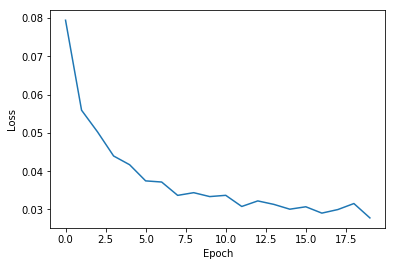

In [25]:
plt.plot(model.history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [26]:
model.evaluate([X_test, X_test], y_test, batch_size = batch_size)

10000/10000 [==============================] - 1s 81us/step


[0.03178207706678659, 0.9935]